In [1]:
import pandas as pd
import numpy as np

def load_housing_data():
    return pd.read_csv("house_price.csv")

In [2]:
df = load_housing_data()
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129,322,126,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52,1467,190,496,177,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52,1274,235,558,219,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52,1627,280,565,259,3.8462,342200.0,NEAR BAY


In [3]:
df.info() #description of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20433 entries, 0 to 20432
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  int64  
 3   total_rooms         20433 non-null  int64  
 4   total_bedrooms      20433 non-null  int64  
 5   population          20433 non-null  int64  
 6   households          20433 non-null  int64  
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


Here the dataset has 0 missing values✅✅

In [4]:
df["ocean_proximity"].value_counts() #count total distinct adresses

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
df.describe() #shows summary of the numerical output

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

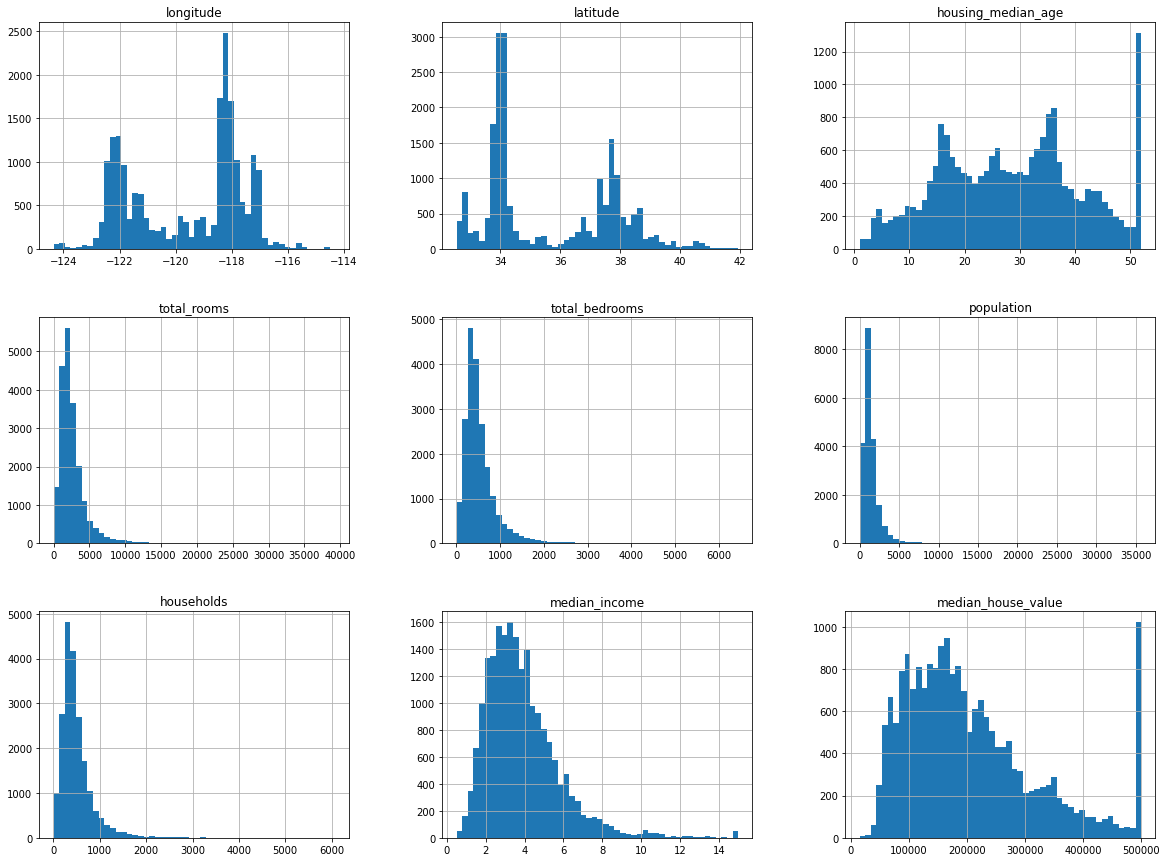

In [6]:
import matplotlib.pyplot as plt

df.hist(bins=50, figsize=(20, 15))

# Train and test split

In [7]:
# import hashlib
# import numpy as np

# def test_set_check(identifier, test_ratio, hash):
#     return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

# def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
#     ids = data[id_column]
#     in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
#     return data.loc[~in_test_set], data.loc[in_test_set]
#     #......not in test set......., in test set..........

If hashing is used in train-test split, a primary key should be used as the identifier for hashing.

If there is no primary key, we can add using .reset_index() method. But if you use this method, make sure the new data gets appended to the end of the dataset, and no row ever gets deleted.
If this is not possible, then you can try to use the most stable features to build a primary key. For example:
```housing_with_id = df['longitude'] * 1000 + df['latitude']``` <br>
Here I have used two most stable features to make a primary key

In [8]:
# data_with_id = df.reset_index() # adds an index column
# train_set, test_set = split_train_test_by_id(data_with_id, 0.2, "index")

***sci-kit learn*** can also be used to split the dataset <br>
```from sklearn.model_selection import train_test_split``` <br>
```train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)```

In [9]:
df['median_income'].value_counts()/len(df)

3.1250     0.002398
15.0001    0.002349
2.8750     0.002251
4.1250     0.002153
2.6250     0.002153
             ...   
6.0723     0.000049
4.6992     0.000049
5.4042     0.000049
6.7744     0.000049
2.0943     0.000049
Name: median_income, Length: 12825, dtype: float64

Splitting using Stratified Sampling based on median income, considering that median income plays a crucial role in prediction

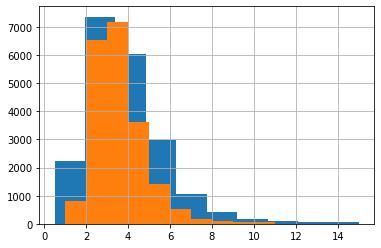

In [10]:
# Compressing the median_income stratum(or subgroups)
df["income_cat"] = np.ceil(df["median_income"]/1.5) # dividing by 1.5 will not reduce the data by much but it will be compressed just ok
# used ceil to have discrete categories 

df["median_income"].hist()
df["income_cat"].hist()
plt.show()

In [11]:
# df["income_cat"] = np.ceil(df["median_income"]/1.5)
df["income_cat"].where(df["income_cat"] < 5, 5.0, inplace=True)

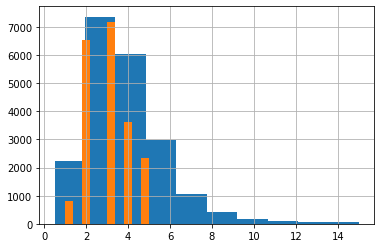

In [12]:
df["median_income"].hist()
df["income_cat"].hist()

plt.show()

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["income_cat"]):
    train_set = df.loc[train_index]
    test_set = df.loc[test_index]

In [14]:
df["income_cat"].value_counts() / len(df)

3.0    0.350218
2.0    0.318847
4.0    0.176724
5.0    0.114374
1.0    0.039838
Name: income_cat, dtype: float64

In [15]:
for set in (train_set, test_set):
    set.drop(["income_cat"], axis=1, inplace=True)

# Data visulazation
*to gain some insights*

In [16]:
# to play with the data
housing = train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

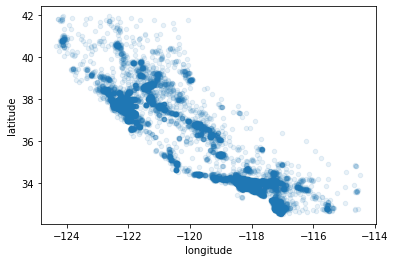

In [17]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1) 
# setting alpha to 0.1 will make it easier to visualize the places with high density of data points

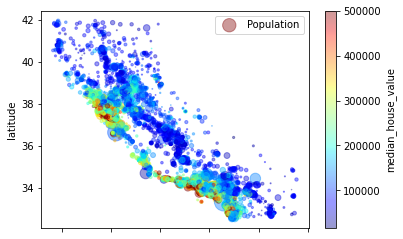

In [18]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s = housing["population"]/100, label="Population",
    c = "median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
# s = radius, color = price :: blue - low ; red - high

plt.legend()

- the housing price near ocean are more than that away

#### Finding correlation between pair of attributes

In [19]:
correlation_matrix = housing.corr()
correlation_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.685403
total_rooms           0.134134
housing_median_age    0.111411
households            0.067427
total_bedrooms        0.052493
population           -0.022055
longitude            -0.048600
latitude             -0.142859
Name: median_house_value, dtype: float64

The correlation matrix ranges from -1 to 1. When its close to 1, it means that there is a strong positive correlation between; for example, the ```median_house_value``` tends to go up when the ```median_income``` goes up. When the coefficient is close to -1, it means that there is a strong negative correlation; here a negative correlation between ```latitude``` and ```median_house_value``` 

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

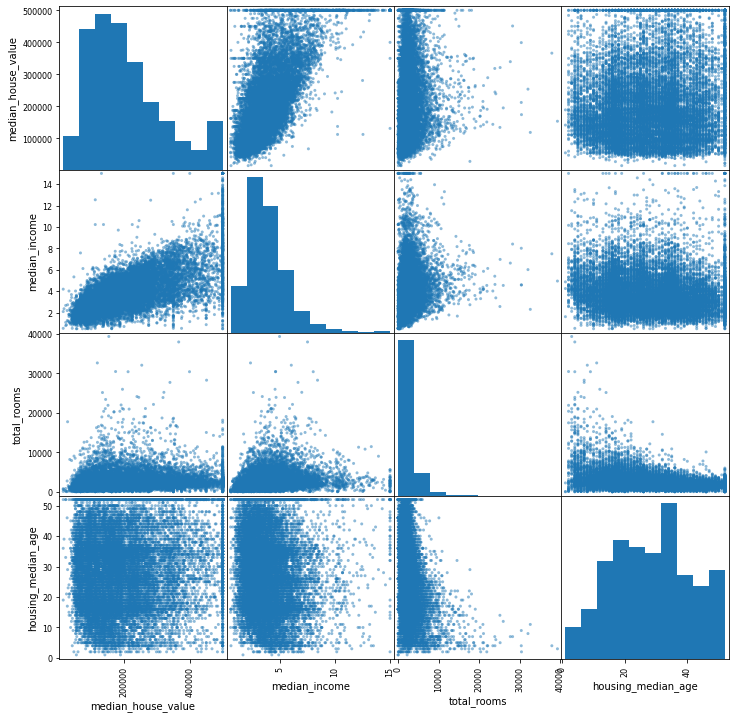

In [22]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 12))

- The most promissing attribute to predict the median house value is the median income

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

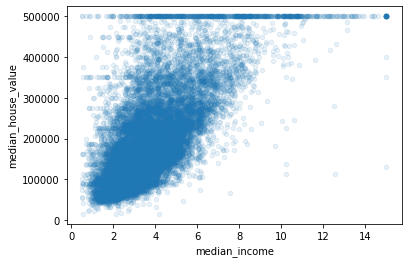

In [26]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

- There is a price cap at $500,000
- Some straight lines around $450,000, $350,000, and perhaps around $280,000 (may be due to noise in the database)

They need to be removed to prevent the algorithm from learning to reproduce these data quirks

### Experimenting with Attribute Combinations

In [27]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["popultation_per_household"] = housing["population"]/housing["households"]

In [28]:
correlation_matrix = housing.corr()
correlation_matrix["median_house_value"].sort_values(ascending=False)

median_house_value           1.000000
median_income                0.685403
rooms_per_household          0.147900
total_rooms                  0.134134
housing_median_age           0.111411
households                   0.067427
total_bedrooms               0.052493
popultation_per_household   -0.019572
population                  -0.022055
longitude                   -0.048600
latitude                    -0.142859
bedrooms_per_room           -0.257572
Name: median_house_value, dtype: float64

- ```bedrooms_per_room``` attribute is much more correlated with the **medain_house_value** than ***rooms_per_household*** or ***total_bedrooms***

# Prepare the Data for Machine Learning Algorithms

In [30]:
housing = train_set.drop("median_house_value", axis=1)
housing_labels = train_set["median_house_value"].copy()

<font size="5"> **Data Cleaning** </font>
- There are 3 ways to get rid of the missing values:
    - Get rid of the entire attribute <br>
    ```df.drop("feature", axis=1)```
    - Get rid of the the row which contain missing values <br>
    ```df.dropna(subset="feature")```
    - Set the values to some value (zero/mean/median) <br>
    ```median = df["feature"].median()``` <br>
    ```df["feature"].fillna(median)```

In [32]:
# Taking care of missing values with sci-kit learn

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median") # Step 1: creating an imputer instance

In [33]:
# Since median can only be computed on numerical values, removing attributes which contain text/other characters
housing_num = housing.drop("ocean_proximity", axis=1)

In [35]:
imputer.fit(housing_num)
# It has computed median of each attribute and stored the median in its statistics_ instance variable

SimpleImputer(strategy='median')

In [36]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2131.    ,  435.    , 1168.    ,
        410.    ,    3.5299])

In [37]:
X = imputer.transform(housing_num)

housing_tr = pd.DataFrame(X, columns=housing_num.columns)

<font size = "5"> **Handling Text and Categorical Attributes** </font>

In [42]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder() #it maps each categorical value to a unique integer, so that the categorical data can be represented as a numerical array
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat) # fit_transform fits and transform but it is more optimized than doing them separatly
housing_cat_encoded

array([0, 0, 0, ..., 0, 1, 3])

In [43]:
encoder.classes_
# <1H OCEAN = 0
# INLAND    = 1
# ISLAND    = 2 ...

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

- But, by doing this machine learning algorithm will think that two nearby values are more similar than than two distant value (for example, cateogories 0 and 4 are more similar than 0 and 1)